<a href="https://colab.research.google.com/github/ProxCentauri/BMI-Calc/blob/main/Sales%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('/content/Salary Prediction of Data Professions.csv')  # Replace 'your_dataset.csv' with your actual dataset file path


In [4]:
# Display the first few rows and basic info about the dataset
print(df.head())


  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB
None


In [6]:
# Summary statistics for numerical columns
print(df.describe())

               AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2636.000000    2639.000000  2636.000000       2637.000000  2637.000000   
mean     24.756449   58136.678287    22.501517          7.503223     3.486159   
std       3.908228   36876.956944     4.604469          4.603193     1.114933   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46781.000000    22.000000          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2639.000000  
mean      1.566881  
std       2.728416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000  


In [7]:
# Check for missing values
print(df.isnull().sum())

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64


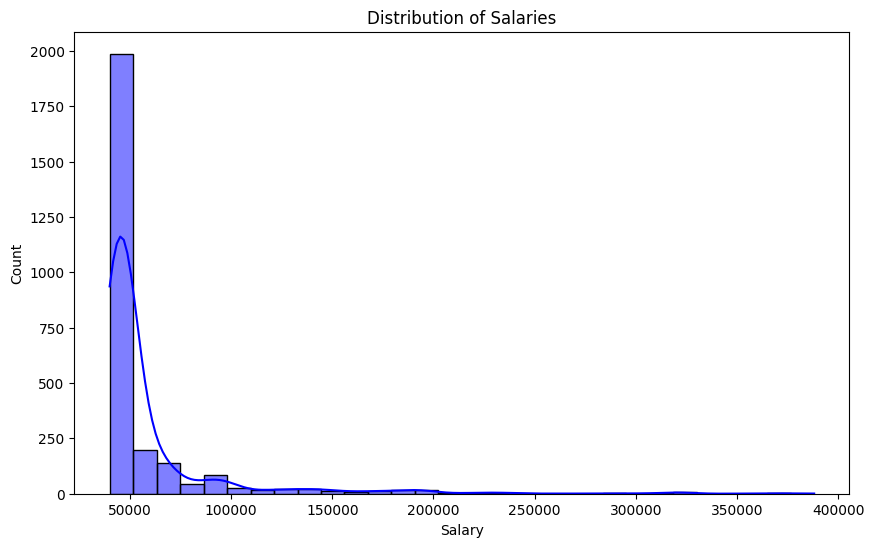

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [9]:
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].mean(), inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].mean(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].mean(), inplace=True)

In [10]:
df['LAST NAME'].fillna(df['LAST NAME'].mode()[0], inplace=True)
df['DOJ'].fillna(df['DOJ'].mode()[0], inplace=True)

In [11]:
print(df.describe())

               AGE         SALARY  LEAVES USED  LEAVES REMAINING      RATINGS  \
count  2639.000000    2639.000000  2639.000000       2639.000000  2639.000000   
mean     24.756449   58136.678287    22.501517          7.503223     3.486159   
std       3.906005   36876.956944     4.601850          4.601448     1.114510   
min      21.000000   40001.000000    15.000000          0.000000     2.000000   
25%      22.000000   43418.000000    19.000000          4.000000     2.000000   
50%      24.000000   46781.000000    22.501517          8.000000     3.000000   
75%      25.000000   51401.500000    26.000000         11.000000     4.000000   
max      45.000000  388112.000000    30.000000         15.000000     5.000000   

          PAST EXP  
count  2639.000000  
mean      1.566881  
std       2.728416  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max      23.000000  


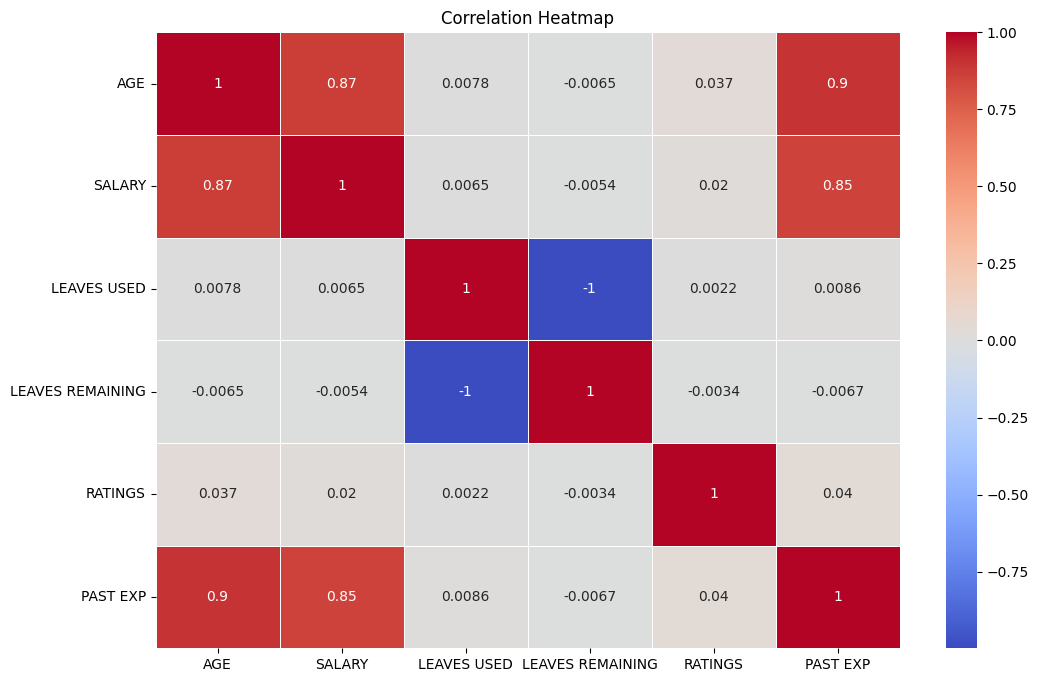

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-13-eee84f648ac7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DESIGNATION', data=df, palette='viridis')


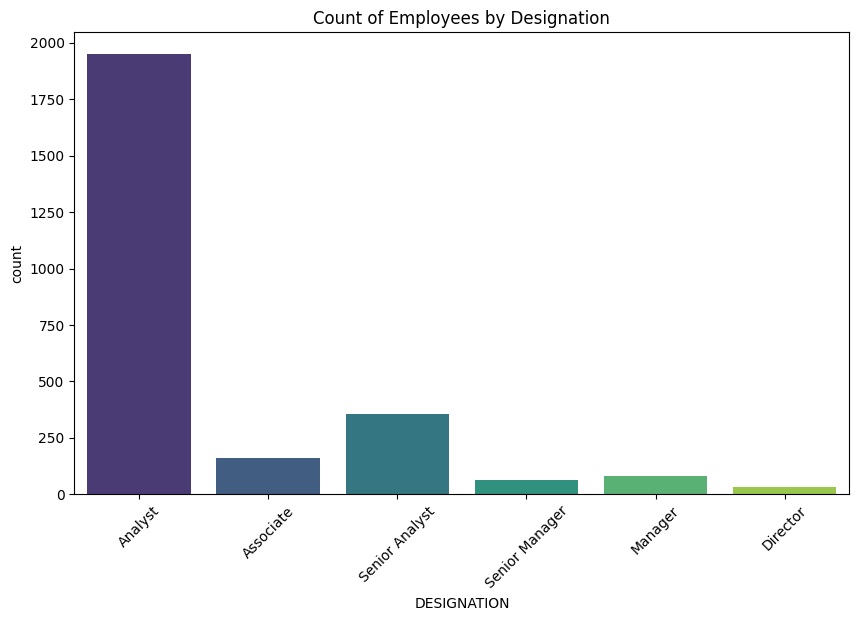

In [13]:
# Explore categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='DESIGNATION', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Employees by Designation')
plt.show()

<ipython-input-14-2ccfd4f72d15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DESIGNATION', y='SALARY', data=df, palette='Set3')


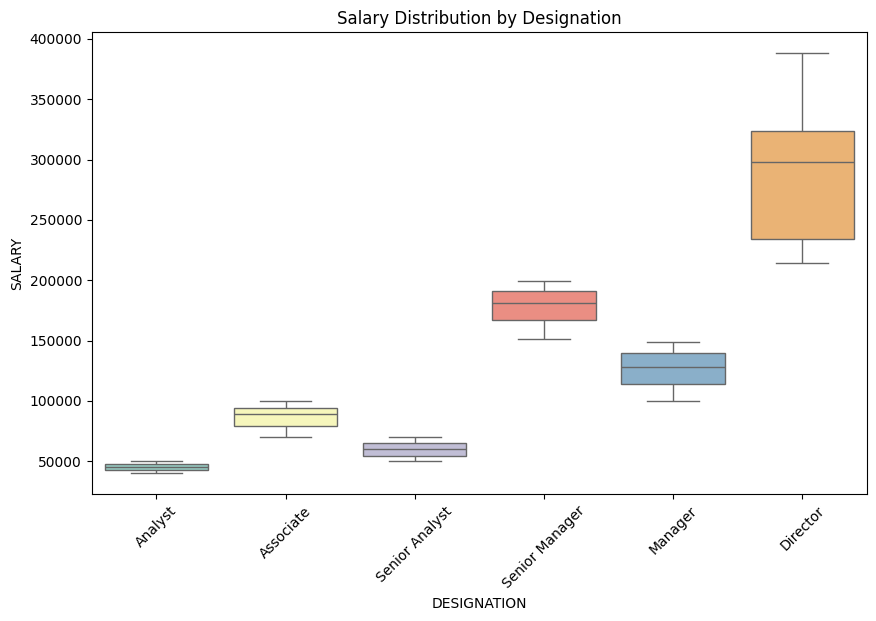

In [14]:
# Explore relationships between salary and other variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='DESIGNATION', y='SALARY', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Designation')
plt.show()

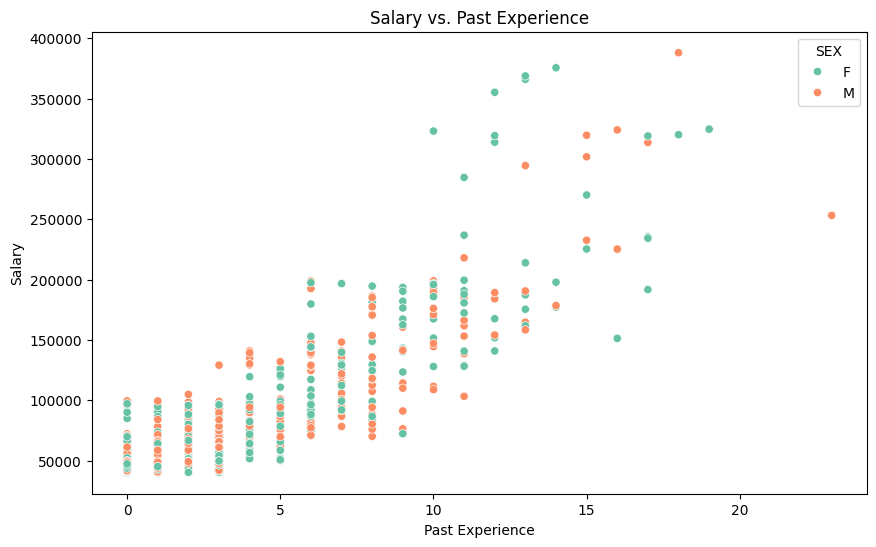

In [15]:
# Relationship between experience and salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PAST EXP', y='SALARY', data=df, hue='SEX', palette='Set2')
plt.title('Salary vs. Past Experience')
plt.xlabel('Past Experience')
plt.ylabel('Salary')
plt.show()

In [17]:
#data preprocessing:

In [18]:
#Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [19]:
# Load the dataset with engineered features
df = pd.read_csv('/content/Salary Prediction of Data Professions.csv')



In [21]:
# Check data types of columns
print(df.dtypes)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Fill missing values with the mean of each numeric column
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify if there are any remaining missing values
print(df.isnull().sum())


FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object
FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64


In [22]:
# Fill missing numerical values with the mean of the column
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [23]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['SEX'] = label_encoder.fit_transform(df['SEX'])
df['DESIGNATION'] = label_encoder.fit_transform(df['DESIGNATION'])
df['UNIT'] = label_encoder.fit_transform(df['UNIT'])


In [28]:
from sklearn.preprocessing import StandardScaler

# Example assuming 'TENURE' and 'AGE_SQUARED' are actually in the DataFrame
numerical_cols = ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

# Check if columns exist in the DataFrame
missing_cols = [col for col in numerical_cols if col not in df.columns]
if missing_cols:
    raise KeyError(f"{missing_cols} not in DataFrame columns")

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Alternatively, if you're adding new columns like 'TENURE' and 'AGE_SQUARED':
# df[['TENURE', 'AGE_SQUARED']] = scaler.fit_transform(df[['TENURE', 'AGE_SQUARED']])


In [29]:
# Save the preprocessed dataframe
df.to_csv('preprocessed_dataset.csv', index=False)

print("Data Preprocessing completed and saved as 'preprocessed_dataset.csv'")

Data Preprocessing completed and saved as 'preprocessed_dataset.csv'


ml model dev

In [30]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [32]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

In [33]:
# Define features and target variable
X = df.drop(columns=['SALARY'])
y = df['SALARY']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train and evaluate multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [44]:
# Define sample data for demonstration
np.random.seed(42)

# Example: Creating sample data for df_train
data_train = {
    'FIRST NAME': ['John', 'Jane', 'Bob', 'Alice', 'Eve'],
    'LAST NAME': ['Doe', 'Smith', 'Johnson', 'Brown', 'Lee'],
    'SEX': ['M', 'F', 'M', 'F', 'F'],
    'DOJ': pd.date_range('2023-01-01', periods=5, freq='M'),
    'CURRENT DATE': pd.Timestamp('2024-06-28'),
    'DESIGNATION': ['Data Analyst', 'Data Scientist', 'Data Engineer', 'Data Analyst', 'Data Engineer'],
    'AGE': [28, 35, 42, 30, 25],
    'SALARY': [60000, 80000, 90000, 65000, 70000],
    'UNIT': ['Analytics', 'Research', 'Engineering', 'Analytics', 'Engineering'],
    'LEAVES USED': [5, 10, 8, 6, 7],
    'LEAVES REMAINING': [15, 10, 12, 14, 13],
    'RATINGS': [4.5, 4.8, 4.2, 4.6, 4.4],
    'PAST EXP': [4, 8, 12, 5, 3]
}


In [45]:
# Example: Creating sample data for df_test
data_test = {
    'FIRST NAME': ['Michael', 'Emily', 'David'],
    'LAST NAME': ['Clark', 'Moore', 'Allen'],
    'SEX': ['M', 'F', 'M'],
    'DOJ': pd.date_range('2022-06-01', periods=3, freq='M'),
    'CURRENT DATE': pd.Timestamp('2024-06-28'),
    'DESIGNATION': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'AGE': [32, 29, 38],
    'SALARY': [62000, 78000, 85000],
    'UNIT': ['Analytics', 'Research', 'Engineering'],
    'LEAVES USED': [7, 9, 6],
    'LEAVES REMAINING': [13, 11, 14],
    'RATINGS': [4.3, 4.7, 4.5],
    'PAST EXP': [6, 7, 10]
}

In [46]:
# Create DataFrame df_train and df_test
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

# Displaying the example dataframes
print("df_train:")
print(df_train)
print("\ndf_test:")
print(df_test)

df_train:
  FIRST NAME LAST NAME SEX        DOJ CURRENT DATE     DESIGNATION  AGE  \
0       John       Doe   M 2023-01-31   2024-06-28    Data Analyst   28   
1       Jane     Smith   F 2023-02-28   2024-06-28  Data Scientist   35   
2        Bob   Johnson   M 2023-03-31   2024-06-28   Data Engineer   42   
3      Alice     Brown   F 2023-04-30   2024-06-28    Data Analyst   30   
4        Eve       Lee   F 2023-05-31   2024-06-28   Data Engineer   25   

   SALARY         UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   60000    Analytics            5                15      4.5         4  
1   80000     Research           10                10      4.8         8  
2   90000  Engineering            8                12      4.2        12  
3   65000    Analytics            6                14      4.6         5  
4   70000  Engineering            7                13      4.4         3  

df_test:
  FIRST NAME LAST NAME SEX        DOJ CURRENT DATE     DESIGNATION  AGE  \
0   

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have defined and stored your models in a dictionary called `models`
models = {
    'Linear Regression': LinearRegression(),
    # Add more models as needed
}

In [52]:
from sklearn.preprocessing import StandardScaler

# Define numeric features
numeric_features = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

# Separate features and target variable for training
X_train = df_train[numeric_features]
y_train = df_train['SALARY']

# Separate features and target variable for testing
X_test = df_test[numeric_features]
y_test = df_test['SALARY']

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on X_train (fit_transform) and transform X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for ease of use
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_features)

# Displaying scaled training and testing datasets
print("\nScaled X_train:")
print(X_train_scaled)
print("\nScaled X_test:")
print(X_test_scaled)



Scaled X_train:
        AGE  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP
0 -0.670402    -1.278724          1.278724      0.0 -0.735767
1  0.502801     1.627467         -1.627467      1.5  0.490511
2  1.676004     0.464991         -0.464991     -1.5  1.716790
3 -0.335201    -0.697486          0.697486      0.5 -0.429198
4 -1.173203    -0.116248          0.116248     -0.5 -1.042337

Scaled X_test:
        AGE  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP
0  0.000000    -0.116248          0.116248     -1.0 -0.122628
1 -0.502801     1.046229         -1.046229      1.0  0.183942
2  1.005602    -0.697486          0.697486      0.0  1.103651


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    'Linear Regression': LinearRegression(),
    # Add more models as needed
}

# Loop through each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    print(f'{model_name} Evaluation:')
    print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
    print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R-squared (R2): {r2_score(y_test, y_pred)}\n')


Linear Regression Evaluation:
Mean Absolute Error (MAE): 53969.69696969647
Mean Squared Error (MSE): 3238878787.8787265
Root Mean Squared Error (RMSE): 56911.14818626247
R-squared (R2): -33.95192936559776



model deploy

In [54]:
# ml_pipeline.py
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


In [55]:

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')


In [56]:
# Define features and target variable
X = df.drop(columns=['SALARY'])
y = df['SALARY']

In [57]:

# Define numerical and categorical columns
numerical_cols = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'TENURE', 'AGE_SQUARED']
categorical_cols = ['SEX', 'DESIGNATION', 'UNIT']


In [58]:

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [59]:
# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


In [66]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Define features and target variable
X = df.drop(columns=['SALARY'])
y = df['SALARY']

# Define numerical and categorical columns
numerical_cols = ['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']
categorical_cols = ['SEX', 'DESIGNATION', 'UNIT']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

# Train the pipeline
pipeline.fit(X, y)

# Save the pipeline
import joblib
joblib.dump(pipeline, 'salary_prediction_pipeline.pkl')

print("ML Pipeline created and saved as 'salary_prediction_pipeline.pkl'")


ML Pipeline created and saved as 'salary_prediction_pipeline.pkl'


In [61]:
print(df_train.columns)

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')


FLASK

In [67]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

In [69]:
from flask import Flask
import joblib

# Initialize Flask application
app = Flask(__name__)

# Load the pre-trained model
model = joblib.load('salary_prediction_pipeline.pkl')

# Now you can define your Flask routes and continue with your application logic.


In [70]:
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    df = pd.DataFrame([data])
    prediction = model.predict(df)
    return jsonify({'predicted_salary': prediction[0]})

In [ ]:
from flask import Flask
import joblib

# Initialize Flask application
app = Flask(__name__)

# Load the pre-trained model
model = joblib.load('salary_prediction_pipeline.pkl')

# Define your Flask routes and other application logic here

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
!pip install Flask  # Install Flask if not already installed

# Run your Flask application
!python app.py  # Replace 'app.py' with your actual script name

# Install ngrok for tunneling
!pip install pyngrok
from pyngrok import ngrok

# Connect ngrok to the port where the Flask app is running
port = 5000  # Replace with your actual port number
public_url = ngrok.connect(port)
print(f"Flask app is running at {public_url}")

# Now visit the public_url in your browser to interact with your Flask app
# Test your Flask application's functionalities

# Once done, kill the ngrok session
ngrok.kill()
